<a href="https://colab.research.google.com/github/BiplobKarmakar/hyundai_used_car_analysis/blob/main/Telecom_Data_Analysis_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Library

In [67]:
import pandas as pd

import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#1. Load the dataset and perform data preprocessing

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Machine_Learning_With_Python_Batch_2/main/Churn.csv") 



#Checking Randomly ten rows

In [16]:
pd.options.display.max_columns = df.shape[1]

display(df.sample(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
3213,93,0,152.1,215.5,262.4,12.0,1,no,no,no,141,25.86,107,18.32,111,11.81,7,3.24,WI,415,392-6286
1044,94,0,243.2,147.0,94.9,7.2,4,no,yes,no,109,41.34,88,12.50,99,4.27,4,1.94,NY,510,417-3046
2341,40,0,109.4,244.7,276.9,7.1,0,no,no,no,107,18.60,102,20.80,123,12.46,7,1.92,LA,510,367-9257
867,86,0,141.3,154.3,210.6,8.2,1,no,no,no,72,24.02,95,13.12,91,9.48,5,2.21,NV,510,353-7730
2770,84,30,106.5,225.7,188.6,5.7,2,no,no,yes,65,18.11,108,19.18,61,8.49,3,1.54,NH,408,409-5749
3263,130,0,132.4,200.3,202.5,6.0,2,no,no,no,81,22.51,110,17.03,103,9.11,1,1.62,DC,510,330-4364
73,90,0,203.4,226.7,152.4,7.3,1,no,no,no,146,34.58,117,19.27,105,6.86,4,1.97,NV,415,399-4246
1811,115,0,109.7,223.8,240.3,15.4,3,no,no,no,148,18.65,87,19.02,96,10.81,8,4.16,NH,510,399-8859
2860,81,0,173.2,236.2,240.2,11.8,2,no,no,no,80,29.44,94,20.08,84,10.81,6,3.19,NM,415,402-9304
1684,115,0,99.7,145.1,149.4,14.1,2,no,no,no,107,16.95,96,12.33,99,6.72,4,3.81,KY,510,380-5102


(3333, 21)


#Checking Columns  & data Types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#Drops Three Columns whose data types are other than numeric

In [18]:
df = df.drop(["Area_Code", "Phone", "State"], axis=1)

print(df.shape)

(3333, 18)


In [19]:
df["Churn"].value_counts()


no     2850
yes     483
Name: Churn, dtype: int64

In [20]:
df["Intl_Plan"].value_counts()


no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [21]:
df["Vmail_Plan"].value_counts()


no     2411
yes     922
Name: Vmail_Plan, dtype: int64

#One-hot Encoding for three columns

In [22]:
df["Churn"] = df["Churn"].replace({"no":0, "yes": 1})
df["Intl_Plan"] = df["Intl_Plan"].replace({"no":0, "yes": 1})
df["Vmail_Plan"] = df["Vmail_Plan"].replace({"no":0, "yes": 1})


In [23]:
display(df.sample(10))


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
893,167,0,244.8,60.8,176.7,10.7,2,0,1,0,91,41.62,105,5.17,110,7.95,3,2.89
311,110,38,236.3,195.9,183.5,9.7,1,0,0,1,102,40.17,112,16.65,82,8.26,6,2.62
3065,122,29,195.4,268.2,168.0,8.4,3,0,0,1,83,33.22,93,22.80,95,7.56,6,2.27
905,161,0,191.9,70.9,204.8,13.4,4,1,0,0,113,32.62,87,6.03,107,9.22,4,3.62
2525,95,0,174.0,281.1,197.2,9.7,0,0,0,0,57,29.58,118,23.89,94,8.87,2,2.62
1239,64,0,168.0,192.4,166.5,10.1,2,0,0,0,116,28.56,94,16.35,98,7.49,3,2.73
523,61,0,45.0,151.3,152.9,9.8,2,0,0,0,108,7.65,74,12.86,94,6.88,6,2.65
1728,113,23,149.0,235.8,201.8,9.5,4,0,0,1,104,25.33,67,20.04,76,9.08,5,2.57
1483,107,0,234.1,163.1,282.5,10.0,1,0,1,0,91,39.80,105,13.86,100,12.71,3,2.70
3253,127,24,154.8,177.2,207.6,9.0,1,0,0,1,69,26.32,105,15.06,102,9.34,4,2.43


# Q2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding

# Ans. One-hot Encoding is better for this dataset

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?

#StandardScaler: 
StandardScaler is the industry's go-to algorithm.  StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.




In [28]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)
display(scaled)

array([[ 0.67648946,  1.23488274,  1.56676695, ...,  0.86602851,
        -0.60119509, -0.0856905 ],
       [ 0.14906505,  1.30794844, -0.33373776, ...,  1.05938994,
        -0.60119509,  1.2411686 ],
       [ 0.9025285 , -0.59175986,  1.16830364, ..., -0.75557074,
         0.21153386,  0.69715637],
       ...,
       [-1.83505538, -0.59175986,  0.01881963, ..., -0.17548645,
         0.61789834,  1.3871231 ],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -1.22139599,
         2.24335625, -1.87695028],
       [-0.67974475,  1.23488274,  1.00304237, ...,  0.80010984,
        -0.19483061,  1.2411686 ]])

In [29]:
display(df.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
775,106,0,169.4,197.2,202.2,10.7,1,0,0,0,107,28.80,71,16.76,79,9.10,4,2.89
866,119,27,220.1,268.2,146.5,11.1,0,0,0,1,128,37.42,133,22.80,80,6.59,3,3.00
2602,86,0,162.4,167.0,128.9,11.4,2,1,1,0,131,27.61,102,14.20,118,5.80,2,3.08
1556,106,0,178.4,247.0,259.9,9.6,0,0,0,0,143,30.33,123,21.00,105,11.70,2,2.59
419,115,0,184.1,327.0,212.5,7.5,2,0,0,0,98,31.30,73,27.80,106,9.56,6,2.03
288,167,0,207.6,132.4,255.2,14.1,0,0,0,0,88,35.29,63,11.25,98,11.48,5,3.81
1457,118,0,133.4,121.0,254.7,5.9,1,0,0,0,113,22.68,92,10.29,129,11.46,4,1.59
1644,124,0,184.8,175.1,158.2,10.5,1,0,0,0,74,31.42,84,14.88,95,7.12,6,2.84
1733,130,0,124.3,270.7,239.5,3.5,0,0,0,0,70,21.13,99,23.01,83,10.78,6,0.95
585,110,0,55.3,164.7,200.7,10.2,1,0,0,0,102,9.40,124,14.00,108,9.03,5,2.75


#MinMaxScaler:
 Min-max scaling is similar to z-score normalization in that it will replace every value in a column with a new value using a formula. In this case, that formula is:

m = (x -xmin) / (xmax -xmin)

Where:

m is our new value
x is the original cell value
xmin is the minimum value of the column
xmax is the maximum value of the column
Using this formula, we will see that the values of each column will now be between zero and one. Let's take a look at an example using a built-in scikit-learn module:

In [31]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.52479339 0.49019608 0.75570125 ... 0.59593545 0.15       0.5       ]
 [0.43801653 0.50980392 0.46066135 ... 0.62223551 0.15       0.68518519]
 [0.56198347 0.         0.69384265 ... 0.37537358 0.25       0.60925926]
 ...
 [0.11157025 0.         0.51539339 ... 0.45427376 0.3        0.70555556]
 [0.75619835 0.         0.60946408 ... 0.31201435 0.5        0.25      ]
 [0.30165289 0.49019608 0.668187   ... 0.58696952 0.2        0.68518519]]


#3b Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?

Ans: We have covered StandardScaler and  MinMaxScaler. Many machine learning models benefit from having features on similar scales. However, there is not a strict rule that defines what kind of transformation is optimal for a particular algoritm.

Both MinMaxScaler and StandardScaler are sensitive to outliers. Thus, in case of outliers that we cannot remove, RobustScaler is a better choice than the other two.

Without the presence of outliers, MinMaxScaler performs well in most cases. However, deep learning algorithms (e.g. neural networks) and regression algorithms are in favor of having features with normal distribution. StandardScaler is a better choice for such cases.

Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization or normalization is not needed before fitting this kind of models

#4 Perform Grid Search and Cross-Validation with Decision Tree Classifier ?

In [32]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)


(3333, 17) (3333, 1)


Train Test Separation

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2333, 17) (1000, 17) (2333, 1) (1000, 1)


In [53]:
y_test["Churn"].value_counts()

0    855
1    145
Name: Churn, dtype: int64

Decision Tree classifier, no grid search


In [36]:
model_DT = DecisionTreeClassifier()
# model_DT = LogisticRegression()
model_DT = model_DT.fit(X_train, y_train)

In [72]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="recall",
                           cv=5,
                           n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

# Model performance evaluation with the best found model in grid search and cross-validation


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


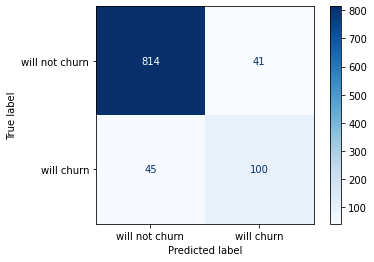

In [73]:
plot_confusion_matrix(model_DT,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Blues")

plt.show()

# 5 Show a tree diagram of the Decision Tree

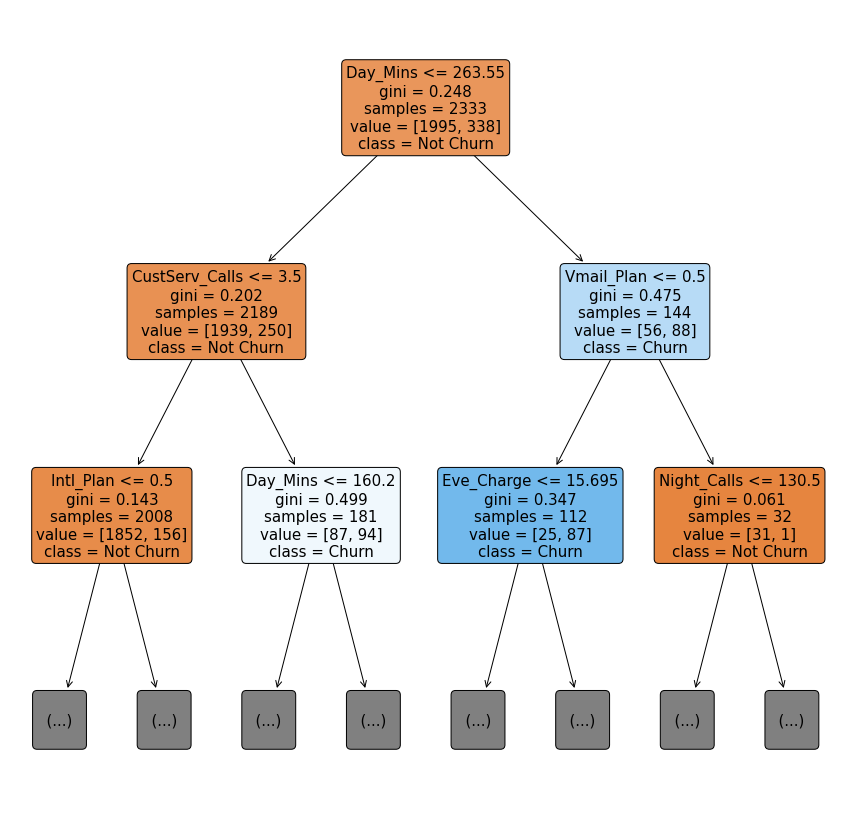

In [69]:
 plt.figure(figsize = (15, 15))
 plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["Not Churn", "Churn"],
          feature_names = X.columns,
           max_depth=2, 
          fontsize=15)

 plt.show()

Training

In [55]:
y_pred = model_DT.predict(X_test)

Prediction Comparison with the test data

In [57]:
y_test["Churn_probability"] = np.round(model_DT.predict_proba(X_test)[:,1], 2)
y_test["Churn_predicted"] = y_pred

display(y_test.head())


,Churn,Churn_probability,Churn_predicted
68,0,0.0,0
1653,1,1.0,1
1716,0,0.0,0
3251,0,0.0,0
2406,0,0.0,0


#6 Show the Confusion Matrix, Classification report, and ROC-AUC

In [62]:
confusion_matrix_ = confusion_matrix(y_test["Churn"],
                                     y_test["Churn_predicted"])

print(confusion_matrix_)

[[814  41]
 [ 45 100]]


In [39]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.914
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.71      0.69      0.70       145

    accuracy                           0.91      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



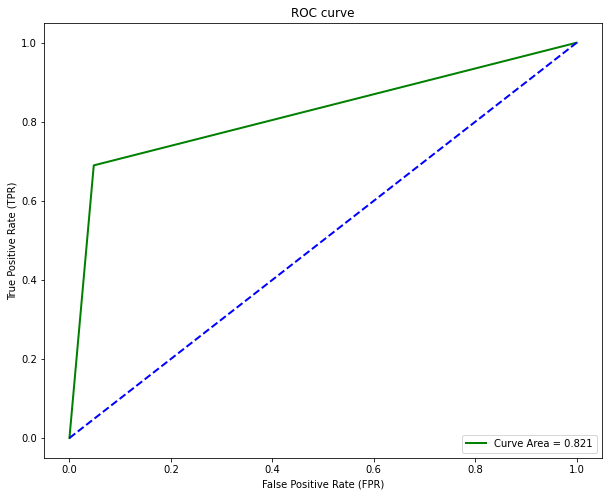

In [40]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Classification report 

In [70]:
classification_report_ = classification_report(y_test["Churn"],
                                               y_test["Churn_predicted"])
print(classification_report_)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       855
           1       0.71      0.69      0.70       145

    accuracy                           0.91      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



# 7 Explain accuracy, precision, recall, f1 score

In [63]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  814
False Negatives =  45
False Positives =  41
True Positives =  100


In [64]:
accuracy = (TN+TP)/(TN+TP+FP+FN)
print(accuracy)


0.914


In [65]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2) #predicted class 1
recall = np.round(TP/(TP+FN), 2) #actual class 1
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1_score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['Churn_predicted']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['Churn_predicted']), 2)

f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['Churn_predicted']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1_score = ", f1_score__)


Calculated __________________________
Precision =  0.71
Recall =  0.69
f1_score =  0.7

Scikit-Learn ________________________
Precision =  0.71
Recall =  0.69
f1_score =  0.7
